# Dog Emotion Classification With YOLO 🐶🦴

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ultralytics
from ultralytics import YOLO
import os
import math
import random
import cv2

ultralytics.checks()
%matplotlib inline

Ultralytics 8.3.140  Python-3.9.21 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)
Setup complete  (24 CPUs, 127.8 GB RAM, 1712.1/1863.0 GB disk)


## Helper Methods

In [ ]:
results = {}

def get_all_img_files(directory):
    img_files = []
    for dirpath, _, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
                img_files.append(dirpath + '/' + filename)
    return img_files

def test(model_path, path, num = 20, fs = 20):
    model = YOLO(model_path)
    test_image_paths = random.sample(get_all_img_files(path), num)
    n = math.ceil(math.sqrt(len(test_image_paths)))
    
    # Set figure size
    plt.figure(figsize=(15, 15))
    
    for i, path in enumerate(test_image_paths):
        results = model.predict(source=path, save=False, project="predictions", imgsz=img_size)
        img_pil = results[0].plot(font_size=fs, pil=True)
        
        # Convert PIL to numpy array
        img_np = np.array(img_pil)
        
        img_rgb = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)
    
        plt.subplot(n, n, i + 1)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title(f"Image {i+1}")
    
    plt.tight_layout()
    plt.show()

## YOLO Model: YOLO11N

In [ ]:
model_1 = YOLO('yolo11n.pt')

img_size= 640

results['model_1'] = model_1.train(
    data='../dataset/dog_dataset_gen_big/dataset.yaml',
    epochs=8,
    batch=12,
    verbose=True,
    workers=16,
    imgsz=img_size,
    patience=5
)

## YOLO Model: YOLO11X

In [ ]:
model_2 = YOLO('yolo11x.pt')

img_size= 640

results['model_2'] = model_2.train(
    data='../dataset/dog_dataset_gen_big/dataset.yaml',
    epochs=8,
    batch=12,
    verbose=True,
    workers=16,
    imgsz=img_size,
    patience=5
)

## YOLO Model: YOLO11L-FACE PT Base

In [ ]:
model_3 = YOLO('yolov11l-face.pt')

img_size= 640

results['model_3'] = model_3.train(
    data='../dataset/dog_dataset_gen_big/dataset.yaml',
    epochs=2,
    batch=2,
    verbose=True,
    workers=16,
    imgsz=img_size,
    patience=2
)

## YOLO Model: YOLO11L-FACE PT Medium

In [ ]:
model_4 = YOLO('yolov11l-face.pt')

img_size= 640

results['model_4'] = model_4.train(
    data='../dataset/dog_dataset_gen_big/dataset.yaml',
    epochs=5,
    batch=8,
    verbose=True,
    workers=16,
    imgsz=img_size,
    patience=5
)

## Champion YOLO Model: YOLO11L-FACE PT Large

In [12]:
model = YOLO('yolov11l-face.pt')

img_size= 640

results['model_champion'] = model.train(
    data='../dataset/dog_dataset_gen_big/dataset.yaml',
    epochs=8,
    batch=12,
    verbose=True,
    workers=16,
    imgsz=img_size,
    patience=5
)

New https://pypi.org/project/ultralytics/8.3.143 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.140  Python-3.9.21 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../dog_dataset_gen_big/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=8, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov11l-face.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train22, nbs=64, nms=False,

train: Scanning C:\Users\awast\source\repos\Dog-Emotion\dog_dataset_gen_big\train\labels.cache... 5526 images, 1 backgrounds, 0 corrupt: 100%|██████████| 5527/5527 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.20.1 ms, read: 725.8267.0 MB/s, size: 535.5 KB)


val: Scanning C:\Users\awast\source\repos\Dog-Emotion\dog_dataset_gen_big\val\labels.cache... 1184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1184/1184 [00:00<?, ?it/s]


Plotting labels to runs\detect\train22\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.00046875), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 16 dataloader workers
Logging results to runs\detect\train22
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/8      7.64G       1.48      2.274      1.957         19        640: 100%|██████████| 461/461 [01:14<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.57it/s]

                   all       1184       1184      0.612      0.812      0.833      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8      7.83G      1.447       1.52       1.89         21        640: 100%|██████████| 461/461 [01:10<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.62it/s]

                   all       1184       1184      0.895      0.905      0.952      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8      7.81G      1.416      1.412       1.85         16        640: 100%|██████████| 461/461 [01:11<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.29it/s]

                   all       1184       1184      0.924      0.951      0.985      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8      7.81G      1.395      1.309       1.82         18        640: 100%|██████████| 461/461 [01:11<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.33it/s]

                   all       1184       1184      0.922      0.944      0.972       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8      7.81G      1.368      1.233      1.798         17        640: 100%|██████████| 461/461 [01:11<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.35it/s]

                   all       1184       1184      0.972      0.976      0.989      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8      7.81G      1.342       1.18      1.773         11        640: 100%|██████████| 461/461 [01:11<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.36it/s]

                   all       1184       1184      0.977      0.976      0.987      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8      7.76G      1.322      1.151       1.76         15        640: 100%|██████████| 461/461 [01:11<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.39it/s]

                   all       1184       1184      0.991      0.989      0.993      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8      7.82G      1.293      1.108      1.738         21        640: 100%|██████████| 461/461 [01:11<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.37it/s]

                   all       1184       1184      0.988      0.991      0.992      0.536



8 epochs completed in 0.177 hours.
Optimizer stripped from runs\detect\train22\weights\last.pt, 51.2MB
Optimizer stripped from runs\detect\train22\weights\best.pt, 51.2MB

Validating runs\detect\train22\weights\best.pt...
Ultralytics 8.3.140  Python-3.9.21 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)
YOLO11l summary (fused): 190 layers, 25,285,480 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.50it/s]


                   all       1184       1184      0.988      0.991      0.992      0.536
                 anger        164        164          1      0.988      0.995       0.53
              calmness        144        144      0.986          1      0.988      0.541
             curiosity        155        155      0.996          1      0.995      0.552
            excitement        126        126          1      0.976      0.995      0.538
                  fear        170        170          1      0.988      0.995      0.541
             happiness        120        120      0.965          1       0.99       0.52
               sadness        150        150       0.99       0.98      0.995      0.526
        submissiveness        155        155      0.966          1      0.986      0.538
Speed: 0.1ms preprocess, 3.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\train22



image 1/1 C:\Users\awast\source\repos\Dog-Emotion\notebooks\..\dog_dataset_gen_big\test\images\443_curly_anger_young_brown.png: 640x640 1 anger, 36.5ms
Speed: 1.5ms preprocess, 36.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\awast\source\repos\Dog-Emotion\notebooks\..\dog_dataset_gen_big\test\images\890_curly_sadness_old_brown.png: 640x640 1 sadness, 165.2ms
Speed: 3.0ms preprocess, 165.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\awast\source\repos\Dog-Emotion\notebooks\..\dog_dataset_gen_big\test\images\318_short-hair_sadness_young_white.png: 640x640 1 sadness, 9.4ms
Speed: 1.5ms preprocess, 9.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\awast\source\repos\Dog-Emotion\notebooks\..\dog_dataset_gen_big\test\images\539_short-hair_curiosity_young_brown.png: 640x640 1 curiosity, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 1.0ms postprocess per image at s

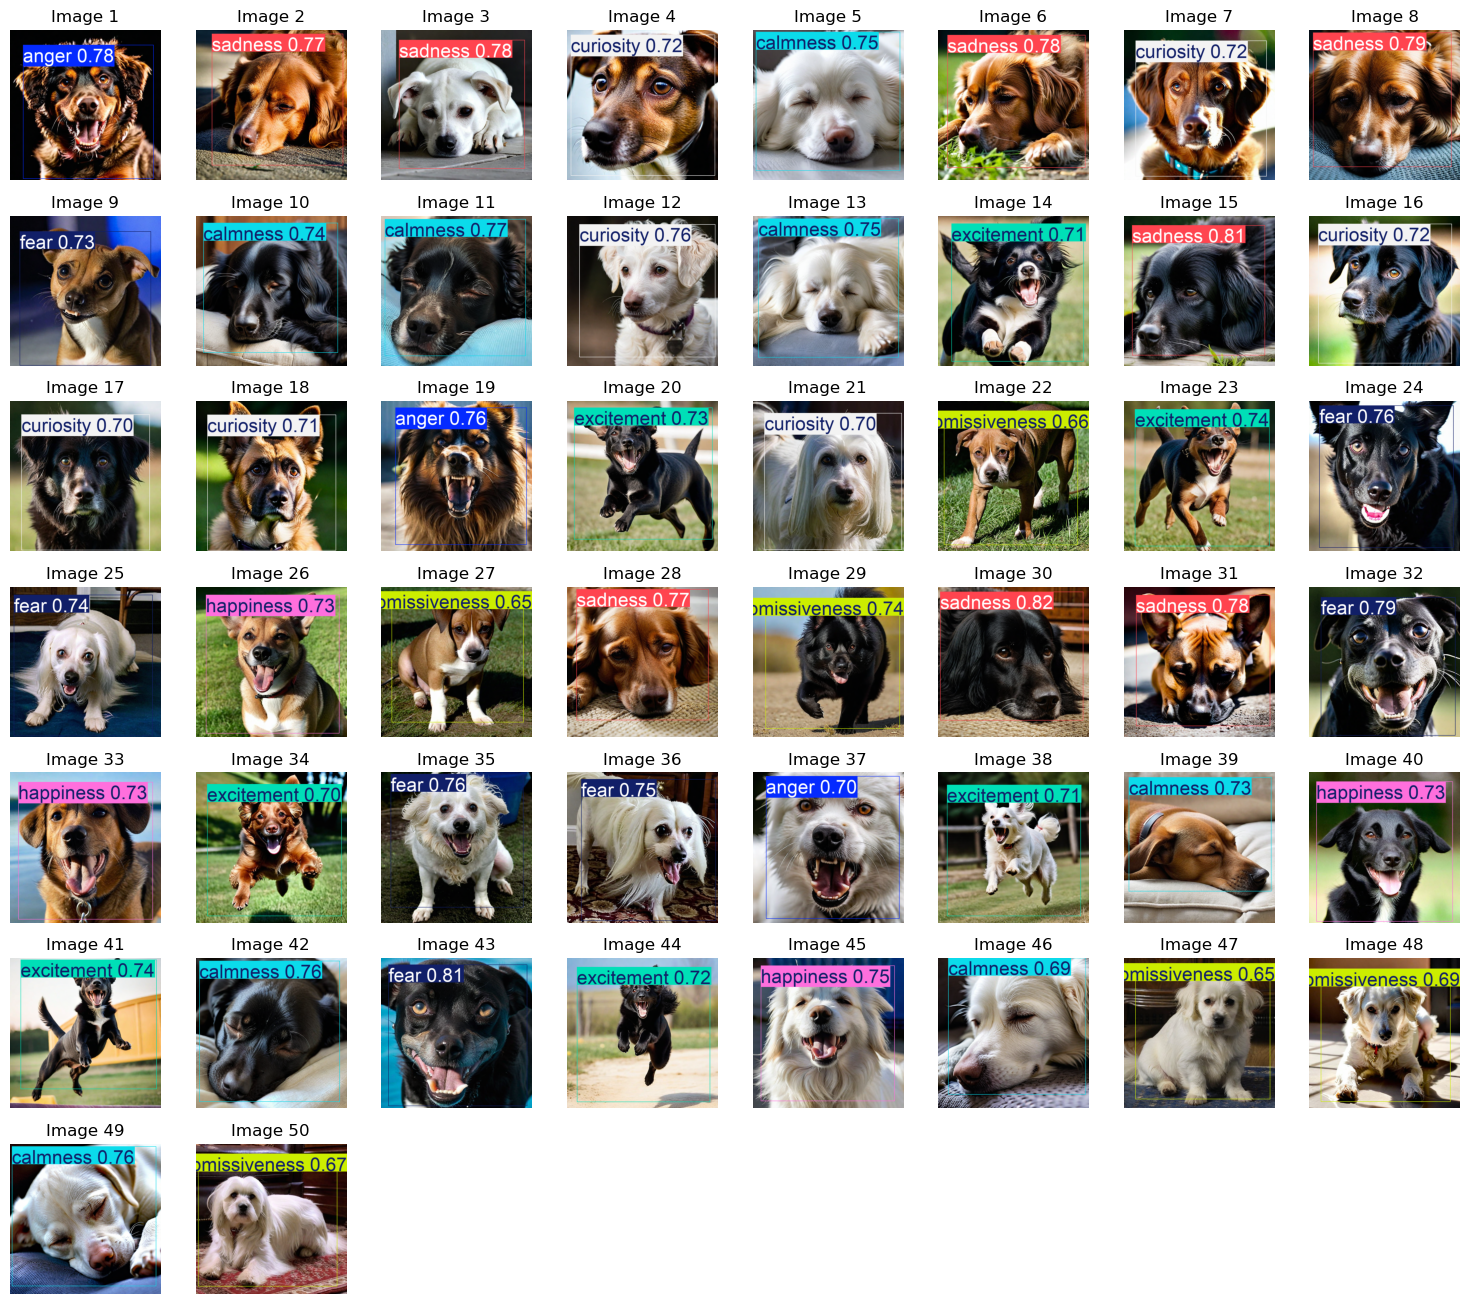

In [13]:
test('../data/dog_dataset_gen_big/test/images/', 50, 80)

## Testing On Real World Data


image 1/1 C:\Users\awast\source\repos\Dog-Emotion\notebooks\..\portraits_dog\000046.jpg: 448x640 (no detections), 7.1ms
Speed: 1.9ms preprocess, 7.1ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\awast\source\repos\Dog-Emotion\notebooks\..\portraits_dog\000050.jpg: 448x640 1 submissiveness, 6.2ms
Speed: 1.8ms preprocess, 6.2ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\awast\source\repos\Dog-Emotion\notebooks\..\portraits_dog\000085.jpg: 448x640 1 submissiveness, 6.8ms
Speed: 1.3ms preprocess, 6.8ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\awast\source\repos\Dog-Emotion\notebooks\..\portraits_dog\000033.jpg: 480x640 1 calmness, 6.9ms
Speed: 1.5ms preprocess, 6.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\awast\source\repos\Dog-Emotion\notebooks\..\portraits_dog\000020.jpg: 512x640 1 submissiveness, 7.0ms
Speed: 1.7ms 

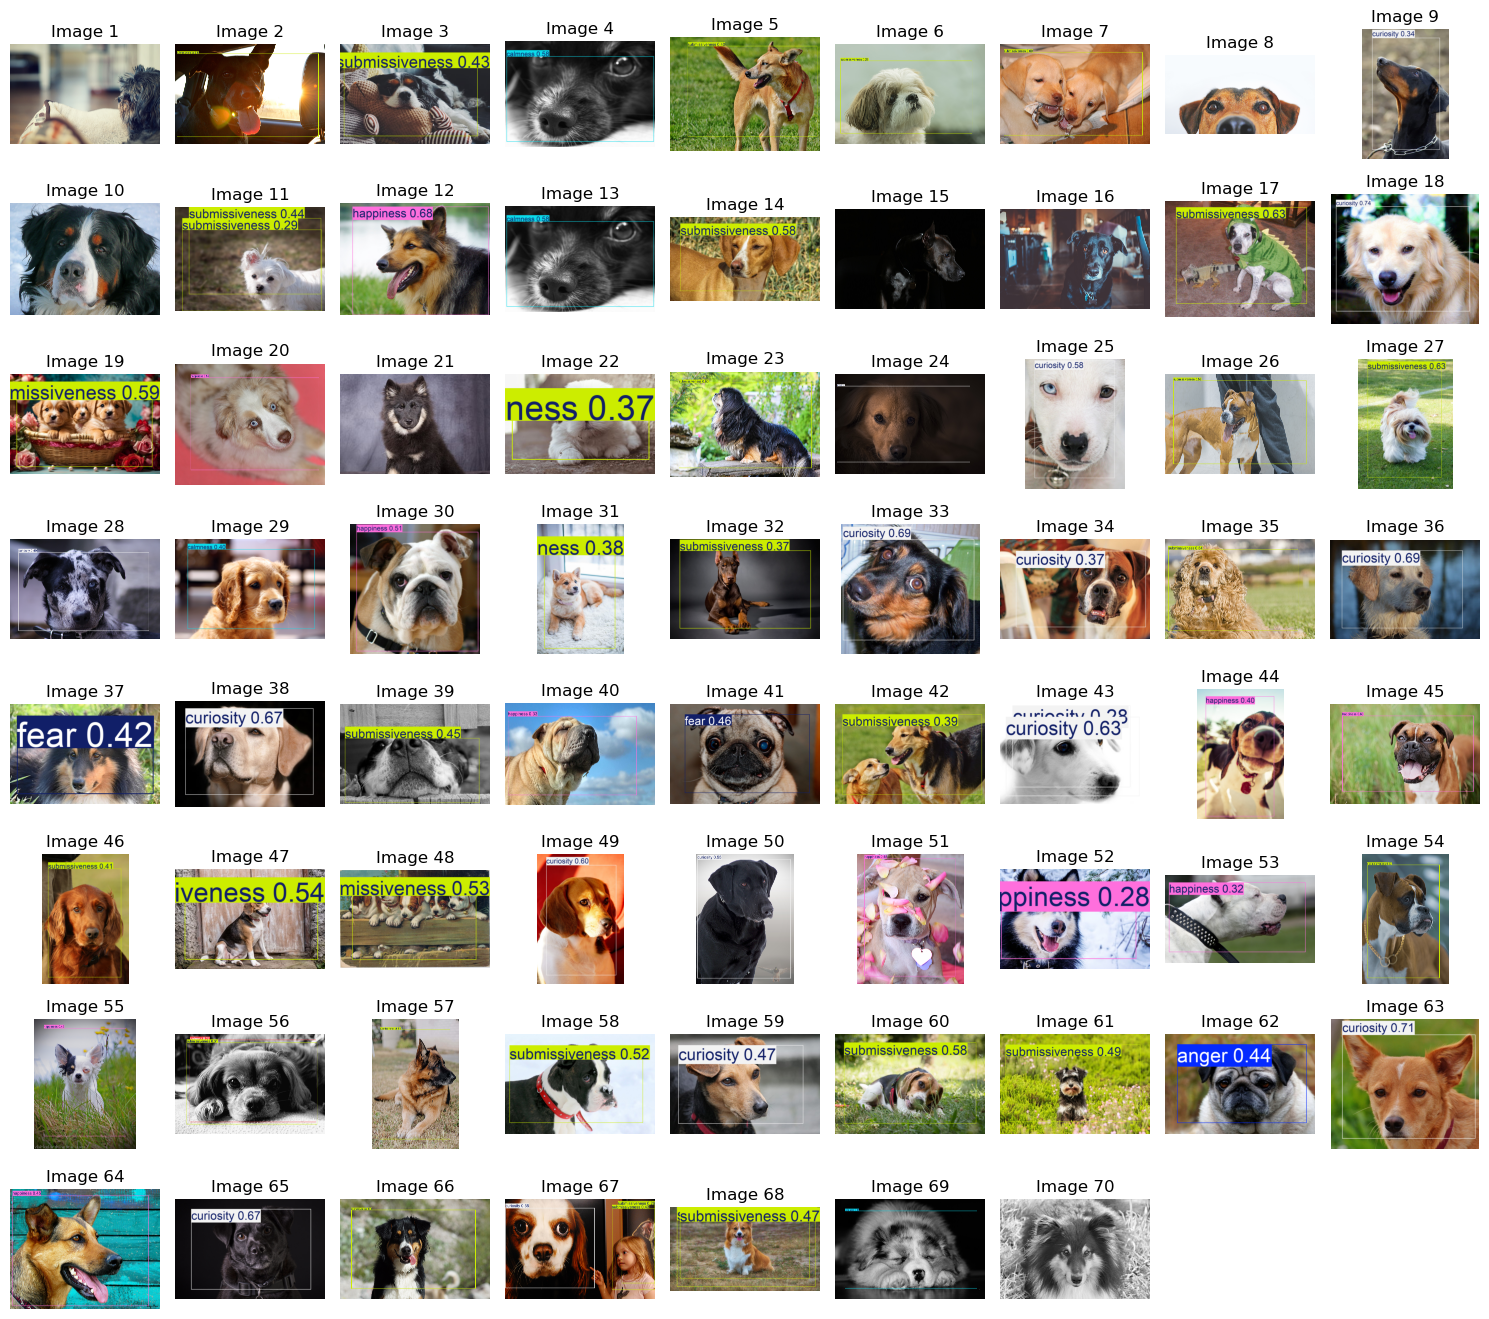

In [16]:
test('../data/portraits_dog/', fs=80, num=70)